In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def cal_prob_metric(pred, label, A_size):
    if len([i for i in pred if i != 0 and i != 1]) != 0:
        pred_ = np.zeros(len(pred))
        pred_[[idx for idx, i in enumerate(pred) if i == A_size]] = 1
        pred = list(pred_)
    
    confu_matrix = confusion_matrix(label, pred, normalize='all')
    # print('Confusion Matrix:')
    # print(confu_matrix)
    return confu_matrix[0,1], confu_matrix[1,1] # prob_false_alarm, prob_detection

def open_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
AK_set = [(3,0),(5,0),(10,0),(15,0),(20,0),(25,0),(30,0),(35,0),(40,0),(45,0),(50,0),
            (10,5),(10,10),(10,15),(10,20),(10,25),(10,30),(10,35),(10,40),(10,45),(10,50)]

In [4]:
res_ova = []
for A, K in AK_set:
    res = {} # sameday_acc, sameday_std, diffday_acc, diffday_std, sameday_pd, diffday_pd, sameday_pe, diffday_pe
    base_path = './ova/A%dK%d'%(A,K)
    same_day_dict = [open_data(os.path.join(base_path, 'res_same_day_run%d.pkl'%r)) for r in range(10)]
    diff_day_dict = [open_data(os.path.join(base_path, 'res_different_day_run%d.pkl'%r)) for r in range(10)]
    acc = [a['acc'] for a in same_day_dict]
    acc_diff = [a['acc'] for a in diff_day_dict]
    res['same_day_acc'] = np.mean(acc)
    res['same_day_std'] = np.std(acc)
    res['diff_day_acc'] = np.mean(acc_diff)
    res['diff_day_std'] = np.std(acc_diff)
    pe_pd = [cal_prob_metric(a['pred'], a['anomaly_label'], A) for a in same_day_dict]
    pe_pd_diff = [cal_prob_metric(a['pred'], a['anomaly_label'], A) for a in diff_day_dict]
    res['same_day_pe'] = np.mean([pe[0] for pe in pe_pd])
    res['same_day_pd'] = np.mean([pd[1] for pd in pe_pd])
    res['diff_day_pe'] = np.mean([pe[0] for pe in pe_pd_diff])
    res['diff_day_pd'] = np.mean([pd[1] for pd in pe_pd_diff])
    # res_ova['A%dK%d'%(A,K)] = res
    res_ova.append(res)

res_autoencoder = []
for A, K in AK_set:
    res = {} # sameday_acc, sameday_std, diffday_acc, diffday_std, sameday_pd, diffday_pd, sameday_pe, diffday_pe
    base_path = './autoencoder/A%dK%d'%(A,K)
    same_day_dict = [open_data(os.path.join(base_path, 'res_same_day_run%d.pkl'%r)) for r in range(10)]
    diff_day_dict = [open_data(os.path.join(base_path, 'res_different_day_run%d.pkl'%r)) for r in range(10)]
    acc = [a['acc'] for a in same_day_dict]
    acc_diff = [a['acc'] for a in diff_day_dict]
    res['same_day_acc'] = np.mean(acc)
    res['same_day_std'] = np.std(acc)
    res['diff_day_acc'] = np.mean(acc_diff)
    res['diff_day_std'] = np.std(acc_diff)
    pe_pd = [cal_prob_metric(a['pred'], a['anomaly_label'], A) for a in same_day_dict]
    pe_pd_diff = [cal_prob_metric(a['pred'], a['anomaly_label'], A) for a in diff_day_dict]
    res['same_day_pe'] = np.mean([pe[0] for pe in pe_pd])
    res['same_day_pd'] = np.mean([pd[1] for pd in pe_pd])
    res['diff_day_pe'] = np.mean([pe[0] for pe in pe_pd_diff])
    res['diff_day_pd'] = np.mean([pd[1] for pd in pe_pd_diff])
    # res_autoencoder['A%dK%d'%(A,K)] = res
    res_autoencoder.append(res)

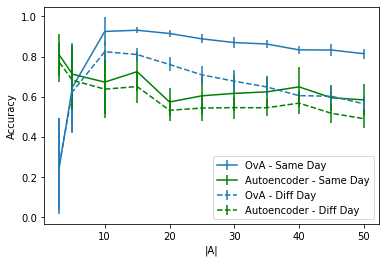

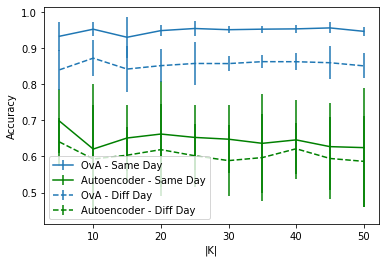

In [5]:
# plot acc with std as error bar
# change A
acc_same_day_ova = [a['same_day_acc'] for a in res_ova[:11]]
std_same_day_ova = [a['same_day_std'] for a in res_ova[:11]]
acc_same_day_autoencoder = [a['same_day_acc'] for a in res_autoencoder[:11]]
std_same_day_autoencoder = [a['same_day_std'] for a in res_autoencoder[:11]]

acc_diff_day_ova = [a['diff_day_acc'] for a in res_ova[:11]]
std_diff_day_ova = [a['diff_day_std'] for a in res_ova[:11]]
acc_diff_day_autoencoder = [a['diff_day_acc'] for a in res_autoencoder[:11]]
std_diff_day_autoencoder = [a['diff_day_std'] for a in res_autoencoder[:11]]

x_data = [i[0] for i in AK_set[:11]]
plt.figure()
plt.errorbar(x=x_data,y=acc_same_day_ova,yerr=std_same_day_ova,label='OvA - Same Day', color='tab:blue')
plt.errorbar(x=x_data,y=acc_same_day_autoencoder,yerr=std_same_day_autoencoder,label='Autoencoder - Same Day', color='g')

plt.errorbar(x=x_data,y=acc_diff_day_ova,yerr=std_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.errorbar(x=x_data,y=acc_diff_day_autoencoder,yerr=std_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|A|')
plt.ylabel('Accuracy')
plt.show()

# change K
acc_same_day_ova = [a['same_day_acc'] for a in res_ova[11:]]
std_same_day_ova = [a['same_day_std'] for a in res_ova[11:]]
acc_same_day_autoencoder = [a['same_day_acc'] for a in res_autoencoder[11:]]
std_same_day_autoencoder = [a['same_day_std'] for a in res_autoencoder[11:]]

acc_diff_day_ova = [a['diff_day_acc'] for a in res_ova[11:]]
std_diff_day_ova = [a['diff_day_std'] for a in res_ova[11:]]
acc_diff_day_autoencoder = [a['diff_day_acc'] for a in res_autoencoder[11:]]
std_diff_day_autoencoder = [a['diff_day_std'] for a in res_autoencoder[11:]]

x_data = [i[1] for i in AK_set[11:]]
plt.figure()
plt.errorbar(x=x_data,y=acc_same_day_ova,yerr=std_same_day_ova,label='OvA - Same Day', color = 'tab:blue')
plt.errorbar(x=x_data,y=acc_same_day_autoencoder,yerr=std_same_day_autoencoder,label='Autoencoder - Same Day', color = 'g')

plt.errorbar(x=x_data,y=acc_diff_day_ova,yerr=std_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.errorbar(x=x_data,y=acc_diff_day_autoencoder,yerr=std_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|K|')
plt.ylabel('Accuracy')
plt.show()

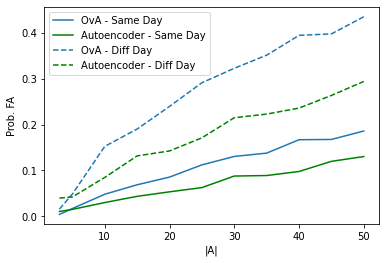

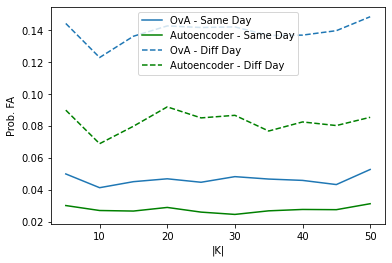

In [6]:
# plot pe 
# change A
pe_same_day_ova = [a['same_day_pe'] for a in res_ova[:11]]
pe_same_day_autoencoder = [a['same_day_pe'] for a in res_autoencoder[:11]]

pe_diff_day_ova = [a['diff_day_pe'] for a in res_ova[:11]]
pe_diff_day_autoencoder = [a['diff_day_pe'] for a in res_autoencoder[:11]]

x_data = [i[0] for i in AK_set[:11]]
plt.figure()
plt.plot(x_data,pe_same_day_ova,label='OvA - Same Day', color='tab:blue')
plt.plot(x_data,pe_same_day_autoencoder,label='Autoencoder - Same Day', color='g')

plt.plot(x_data,pe_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.plot(x_data,pe_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|A|')
plt.ylabel('Prob. FA')
plt.show()

# change K
pe_same_day_ova = [a['same_day_pe'] for a in res_ova[11:]]
pe_same_day_autoencoder = [a['same_day_pe'] for a in res_autoencoder[11:]]

pe_diff_day_ova = [a['diff_day_pe'] for a in res_ova[11:]]
pe_diff_day_autoencoder = [a['diff_day_pe'] for a in res_autoencoder[11:]]

x_data = [i[1] for i in AK_set[11:]]
plt.figure()
plt.plot(x_data,pe_same_day_ova,label='OvA - Same Day', color='tab:blue')
plt.plot(x_data,pe_same_day_autoencoder,label='Autoencoder - Same Day', color='g')

plt.plot(x_data,pe_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.plot(x_data,pe_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|K|')
plt.ylabel('Prob. FA')
plt.show()


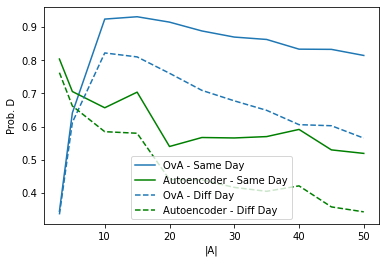

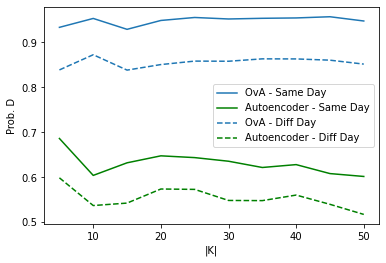

In [7]:
# plot pd
# change A
pd_same_day_ova = [a['same_day_pd'] for a in res_ova[:11]]
pd_same_day_autoencoder = [a['same_day_pd'] for a in res_autoencoder[:11]]

pd_diff_day_ova = [a['diff_day_pd'] for a in res_ova[:11]]
pd_diff_day_autoencoder = [a['diff_day_pd'] for a in res_autoencoder[:11]]

x_data = [i[0] for i in AK_set[:11]]
plt.figure()
plt.plot(x_data,pd_same_day_ova,label='OvA - Same Day', color='tab:blue')
plt.plot(x_data,pd_same_day_autoencoder,label='Autoencoder - Same Day', color='g')

plt.plot(x_data,pd_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.plot(x_data,pd_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|A|')
plt.ylabel('Prob. D')
plt.show()

# change K
pd_same_day_ova = [a['same_day_pd'] for a in res_ova[11:]]
pd_same_day_autoencoder = [a['same_day_pd'] for a in res_autoencoder[11:]]

pd_diff_day_ova = [a['diff_day_pd'] for a in res_ova[11:]]
pd_diff_day_autoencoder = [a['diff_day_pd'] for a in res_autoencoder[11:]]

x_data = [i[1] for i in AK_set[11:]]
plt.figure()
plt.plot(x_data,pd_same_day_ova,label='OvA - Same Day', color='tab:blue')
plt.plot(x_data,pd_same_day_autoencoder,label='Autoencoder - Same Day', color='g')

plt.plot(x_data,pd_diff_day_ova,label='OvA - Diff Day', color='tab:blue', linestyle='dashed')
plt.plot(x_data,pd_diff_day_autoencoder,label='Autoencoder - Diff Day',color='g',linestyle='dashed')

plt.legend()
plt.xlabel('|K|')
plt.ylabel('Prob. D')
plt.show()